# Projeto - Crédito para Financiamento de Imóveis

## Orientações gerais

O projeto de encerramento de curso será dividido em três partes e utilizado como avaliação dos módulos de Data Engineering, Data Science e AWS.

## Contextualização

A PyCoders Ltda., cada vez mais especializada no mundo da Inteligência Artificial e Ciência de Dados, foi procurada por uma fintech para desenvolver um projeto de concessão de crédito para imóveis. Nesse projeto, espera-se a criação de score que discrimine ao máximo os bons pagadores dos maus pagadores. Para isso, foi disponibilizada uma base de dados com milhares de casos de empréstimos do passado, com diversas características dos clientes. Deve ser entregue um modelo para realizar essa classificação. Por questões contratuais, o pagamento será realizado baseado no desempenho (ROC AUC).


## Base de Dados

Serão utilizadas bases de dados com informações cadastrais, histórico de crédito e balanços financeiros de diversos clientes. O conjunto de dados está dividido em treino e teste, todos no formato csv. Toda a modelagem, validação e avaliação deve ser feita em cima do conjunto de treino, subdividindo tal base como achar melhor. Existe também a base das variáveis explicativas, para ajudar no desenvolvimento do projeto.

[Baixar aqui](https://s3-sa-east-1.amazonaws.com/lcpi/0694c90a-7782-47f7-8bbc-e611d31f9f21.zip)



# Parte 1: Data Engineering

**Preparação:** Salve os arquivos `.csv` em `/FileStore/tables/projeto_credito/`, sem alterar seus nomes.

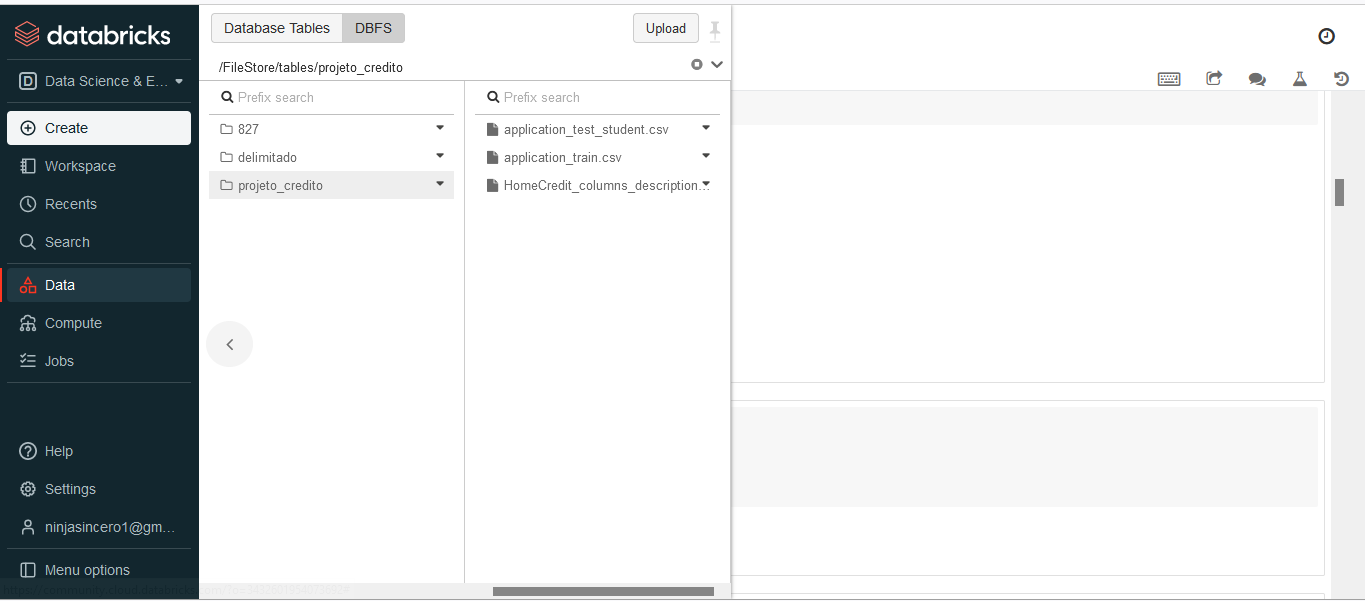

## Antes de modelar

1. Crie um `fluxo de dados` no Databricks para as bases que serão utiizadas.
    1. Insira os dados brutos na primeria camada.
    1. Salve as transformações / limpezas na segunda camada.
   
    1. Crie uma pipeline para o processo.
        1. Pipeline, nesse caso, será um único script que gere todas as tabelas acima.

## Durante a modelagem

1. Selecione e salve as colunas relevantes e features criadas na terceira camada.

1. Salve as versões do modelo no formato `pickle` no DBFS.

1. Mantenha o controle das versões criando uma tabela no formato
**ATENÇÂO:** Como estamos na versão community, lembre de exportar a tabela abaixo para o DBFS antes da sessão encerrar.

|id_modelo|nome_modelo|data_treino|método|roc_auc|tempo_de_treino(s)|hyperparametros|path_to_pickle
|---|---|---|---|---|---|---|---|
|1|RandomForestRapida|2022-02-22|Random Forest Simples|0.76|124|\[max_depth=4, ...\]|/FileStore/tables/modelos/...|

## Após modelar

1. Salve os dados de treino e validação em uma tabela (para que seja possível reproduzir resultados no futuro).
    1. Crie uma coluna com o id do modelo escolhido para refêrencia. 

## Regras de Entrega

1. Um notebook (databricks) com a pipeline que gere as tabelas da fase *Antes de modelar*. O notebook deve rodar de uma vez só!

1. Um arquivo `.csv` com as informações da tabela gerada na fase *Durante a modelagem*.

1. Um notebook que gere as tabelas de treino e validação do passo *Após modelar*. O notebook deve rodar de uma vez só!

> **IMPORTANTE:** Tendo em vista que não teremos apresentação do projeto (e não queromos pedir que vocês gravem um vídeo explicando o notebook, haha), é indispensável que ele esteja organizado e comentado.

# Parte 2: Data Science

## Requisitos Obrigatórios do Projeto

1. **Análise Exploratória dos Dados:** análise descritiva dos dados numéricos e categóricos, bem como gráficos (de sua preferência).
2. **Data Cleaning:** a base de dados apresenta dados ausentes. Sendo assim, você deverá realizar uma limpeza dos dados, removendo-os ou preenchendo com valores coerentes.
3. **Conversão de variáveis categóricas**
4. **Balanceamento de amostras:** nesse caso, como o dataset possui muitas amostras, você pode utilizar o NearMiss para realizar um *under sampling*.
5. **Machine Learning:** aplique algum algoritmo de ML, de sua preferência, dividindo o seu conjunto de dados em treino e teste, para obter o `roc_auc_score` de ambos os cenários (treino e teste).

## Regras de Entrega

1. Deve ser entregue uma base com as predições para a base de teste.
    - Essa base deverá ser um Data Frame com duas colunas: a primeira sendo o SK_ID_CURR e a segunda a probabilidade de inadimplência.
    - ⚠️ Entregar as predições com a probabilidade da inadimplência ocorrer.
2. Deve ser entregue o notebook com as etapas que foram aplicadas na criação do modelo (especificadas na subseção anterior).

> **IMPORTANTE:** Tendo em vista que não teremos apresentação do projeto (e não queromos pedir que vocês gravem um vídeo explicando o notebook, haha), é indispensável que ele esteja organizado e comentado.

<a href="https://s3-sa-east-1.amazonaws.com/lcpi/94acac51-8ce4-465b-a06d-a1cf19ec5d93.ipynb" style="display: block; background-color: #222; padding: 20px; text-align: center; font-weight: 600;">
Clique aqui para fazer o download do notebook com as instruções.
</a>

### Importação das bibliotecas:

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

### Carregando e explorando dataset description:

In [13]:
# Carregando dataset description
df_description = pd.read_csv('HomeCredit_columns_description.csv', encoding='latin1')

In [14]:
df_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   219 non-null    int64 
 1   Table        219 non-null    object
 2   Row          219 non-null    object
 3   Description  219 non-null    object
 4   Special      86 non-null     object
dtypes: int64(1), object(4)
memory usage: 8.7+ KB


In [17]:
df_description.head(10)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [18]:
df_description.tail(10)

,Unnamed: 0,Table,Row,Description,Special
209,212,previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application
210,213,previous_application.csv,NFLAG_INSURED_ON_APPROVAL,Did the client requested insurance during the ...,NaN
211,214,installments_payments.csv,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
212,215,installments_payments.csv,SK_ID_CURR,ID of loan in our sample,hashed
213,216,installments_payments.csv,NUM_INSTALMENT_VERSION,Version of installment calendar (0 is for cred...,NaN
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN
218,221,installments_payments.csv,AMT_PAYMENT,What the client actually paid on previous cred...,NaN


In [19]:
df_description.Table.unique()

array(['application_{train|test}.csv', 'bureau.csv', 'bureau_balance.csv',
       'POS_CASH_balance.csv', 'credit_card_balance.csv',
       'previous_application.csv', 'installments_payments.csv'],
      dtype=object)

### Copiando dataset description para limpeza:

In [38]:
df_description_cuted = df_description.copy()

In [39]:
df_description_cuted.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [41]:
filter_0 = df_description_cuted['Table'] == 'application_{train|test}.csv'

In [43]:
df_description_cuted = df_description_cuted[filter_0]

In [44]:
df_description_cuted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 121
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   122 non-null    int64 
 1   Table        122 non-null    object
 2   Row          122 non-null    object
 3   Description  122 non-null    object
 4   Special      56 non-null     object
dtypes: int64(1), object(4)
memory usage: 5.7+ KB


In [45]:
df_description_cuted.Table.unique()

array(['application_{train|test}.csv'], dtype=object)

### Carregando e explorando dataset train:

In [3]:
# Carregando dataset train
df_train = pd.read_csv('application_train.csv')
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,3.0
3,361264,0,Cash loans,F,N,Y,0,270000.0,814041.0,28971.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
4,260639,0,Cash loans,F,N,Y,0,144000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,10.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,242114,0,Cash loans,F,N,Y,1,270000.0,1172470.5,34411.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0
246004,452374,0,Cash loans,F,N,Y,0,180000.0,654498.0,27859.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
246005,276545,1,Revolving loans,M,N,N,1,112500.0,270000.0,13500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
246006,236776,1,Cash loans,M,Y,N,3,202500.0,204858.0,17653.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246008 entries, 0 to 246007
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 229.0+ MB


In [9]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,3.0
3,361264,0,Cash loans,F,N,Y,0,270000.0,814041.0,28971.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
4,260639,0,Cash loans,F,N,Y,0,144000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,10.0,0.0,0.0


In [12]:
df_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [5]:
df_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,246008.000000,246008.000000,246008.000000,2.460080e+05,2.460080e+05,245998.000000,2.457820e+05,246008.000000,246008.000000,246008.000000,...,246008.000000,246008.000000,246008.000000,246008.000000,212836.000000,212836.000000,212836.000000,212836.000000,212836.000000,212836.000000
mean,278280.072908,0.081176,0.415527,1.689122e+05,5.996283e+05,27129.162648,5.389289e+05,0.020882,-16042.794393,63963.755699,...,0.007975,0.000589,0.000508,0.000289,0.006291,0.006944,0.034487,0.267403,0.264109,1.900040
std,102790.909988,0.273106,0.719922,2.603818e+05,4.030672e+05,14504.965232,3.699738e+05,0.013852,4365.973763,141400.318322,...,0.088948,0.024271,0.022536,0.016986,0.083236,0.109538,0.204179,0.916640,0.611269,1.868217
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189165.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16561.125000,2.385000e+05,0.010006,-19691.000000,-2758.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278392.500000,0.000000,0.000000,1.485000e+05,5.147775e+05,24930.000000,4.500000e+05,0.018850,-15763.000000,-1215.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367272.250000,0.000000,1.000000,2.025000e+05,8.086500e+05,34599.375000,6.795000e+05,0.028663,-12418.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,19.000000,23.000000


### Carregando e explorando dataset application_test_student:

In [46]:
# Carregando dataset application_test_student
df_test = pd.read_csv('application_test_student.csv')
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,149741,Cash loans,F,N,N,0,117000.0,417024.0,20191.5,360000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
1,363290,Cash loans,M,N,Y,0,450000.0,640080.0,31261.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,436006,Revolving loans,M,Y,Y,0,450000.0,900000.0,45000.0,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
3,377703,Cash loans,M,Y,N,1,360000.0,1125000.0,33025.5,1125000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,188624,Cash loans,M,Y,Y,0,675000.0,835380.0,42840.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,102817,Cash loans,M,Y,N,0,225000.0,472500.0,46161.0,454500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
61499,343961,Cash loans,M,N,Y,0,112500.0,508495.5,24592.5,454500.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
61500,427828,Cash loans,F,Y,Y,0,157500.0,808650.0,23643.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
61501,405956,Cash loans,F,N,Y,0,202500.0,590337.0,30271.5,477000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


# Parte 3: AWS

**TBD**